# Computer Vision Workshop (DHN 2020) 

## Notebooks authors 

- Daniel van Strien
- Kaspar Beelen 

# Computer Vision Workshop
### A Gentle Introduction to Computer Vision with Deep Learning 

Don't forget to turn on your free GPU!

### Import libraries and setup notebook magic 

In [ ]:
!pip install fastai nbdev --upgrade

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Overview of this notebook

- Neural network architectures blablabla (20 mins)
- Transfer learning and other tricks (20 mins)

# Supervised Machine Learning (recap)

- Uses data to **learn** a relation between **content and labels**. 
- There are different approaches to managing the learning process.
- Deep Learning methods emerged as the **state-of-art** (unbeatable for now) in Computer Vision.
- Deep learnign models **learn features** directly from the data (as opposed to explicit feature engineering approaches, i.e. pointy-ear-detector for cats vs. dogs task).


# Learning the parameters of a model

So what are (deep) neural networks and how do they work?

Let's look at a very simple network ($f(x)$), consisting of one **fully connected layer**. 

$$f(x) = softmax(Ax+B)$$ 

The image below shows a network with two fully connected layers.

![Two fully connected layers](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/74_blog_image_1.png)

In this scenario, $x$ is called the **input vector**. A vector is nothing more than a row of numbers, i.e. think of a vector of length 4 capturing the pixel intensity of a 2x2 image:

$$[255, 10, 244, 0]$$

$A$ is a matrix of **weights** or **parameters** that transforms the input vector by multiplication. 

$$\begin{bmatrix} 0.5 & 0.2 & 0.1 & 0.2  \\ 0.3 & 0.0 & 0.5 & 0.2  \end{bmatrix}$$

If we multiply $A$ (2 x 4 matrix) with $x$ (4 x 1 vector) we get a 2 x 1 vector

$$[153.9, 198.5]$$

to which we can **add** the **bias** term $B$--another 2x1 vector. For this example, imagine the vector to be equal to

$$B = [0, 1]$$

The above formula, given the matrices $A$, $B$ input $x$ then returns:


$$f(x) =softmax([153.9, 199.5])$$


In the last step, we feed the output of $Ax + B$ to the **softmax** function, which turns these numbers into probabilities (i.e. between zero and one, and ensuring their sum equals to one.)


In Python the result would be:
```python
In [1]: softmax([153.9, 199.5])  

Out[2]: array([1.57098351e-20, 1.00000000e+00])
```

If you think of it, the previous procedure could be used for binary classification:

- it **ingests** a **vector** that represents an image of four pixels;
- it **returns** a **probability** that the image belongs to one of the two **output classes**;

What we created here is a very simple network architecture. To make it work we have to feed the network many labelled examples, i.e many $x_i$ input vectors with corresponding $y_i$ output classes.

- **Training** here refers to the process of **adjusting the parameters** (of the matrix $A$a and vector $B$) so that the model performs as good as possible in predicting the correct $y_i$ for each $x_i$. By training, we **fit** the parameters of the model.

- During training, we find the parameters that minimize the **loss**, i.e. the difference between the **predicted and the actual labels**.

- In the **validation** stage we inspect how well our model behaves on examples it hasn't seen while training. 

### Key concepts

- input
- labels
- neural network
- training 
- validation
- loss
- parameters/weights

## Questions?

# Practical steps to training a deep learning model (aka a crude overview of deep learning...)

This notebook doesn't promise to explain everything but will hopefully give you a high level overview with some minor/major hand waving in places to cover up some of the details. The aim here isn't to cover everything but give an overview of the process. 

# Steps to train a network 

## Input

To train our network we start with some inputs to the network, this is the data our network learns from. In our case these are images. 

### Image representation

Probably you know that computers store images as pixel values. This essentially means that images on a computer are already represented as a **tensor** of numbers. 

--2020-10-14 14:15:49--  https://ia600207.us.archive.org/32/items/aliceimspiegella00carrrich/__ia_thumb.jpg
Resolving ia600207.us.archive.org (ia600207.us.archive.org)... 207.241.227.227
Connecting to ia600207.us.archive.org (ia600207.us.archive.org)|207.241.227.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7414 (7.2K) [image/jpeg]
Saving to: ‘__ia_thumb.jpg’

__ia_thumb.jpg      100%[===================>]   7.24K  --.-KB/s    in 0s      

2020-10-14 14:15:49 (1.10 GB/s) - ‘__ia_thumb.jpg’ saved [7414/7414]



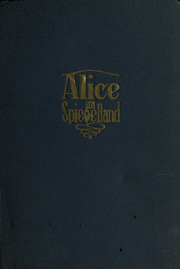

In [4]:
!wget "https://ia600207.us.archive.org/32/items/aliceimspiegella00carrrich/__ia_thumb.jpg"
from PIL import Image
import numpy as np
im = Image.open('__ia_thumb.jpg')
im

In [5]:
np_im = np.array(im)
np_im
np_im.shape

(269, 180, 3)

In [6]:
np_im

array([[[ 2,  6,  5],
        [ 5,  9,  8],
        [ 7, 11, 10],
        ...,
        [34, 39, 42],
        [ 9, 14, 17],
        [ 3,  8, 11]],

       [[ 3,  7,  6],
        [20, 24, 23],
        [31, 35, 34],
        ...,
        [58, 63, 66],
        [54, 59, 62],
        [28, 33, 36]],

       [[20, 24, 23],
        [22, 26, 25],
        [25, 29, 28],
        ...,
        [50, 55, 58],
        [67, 72, 75],
        [70, 75, 78]],

       ...,

       [[17, 23, 23],
        [25, 31, 31],
        [24, 29, 32],
        ...,
        [43, 48, 51],
        [42, 47, 50],
        [42, 47, 50]],

       [[15, 21, 21],
        [23, 29, 29],
        [25, 31, 31],
        ...,
        [43, 48, 51],
        [41, 46, 49],
        [41, 46, 49]],

       [[11, 17, 17],
        [20, 26, 26],
        [24, 30, 30],
        ...,
        [41, 47, 47],
        [41, 47, 47],
        [44, 50, 50]]], dtype=uint8)

This is very handy for us since neural networks work with numbers. The image below shows a little bit what this looks like. 

![Images pixels as a matrix of numbers](https://raw.githubusercontent.com/davanstrien/computer-vision-DHNoridic-2020-workshop/notebooks/figs/pixels_matrix.png) 

*Source: Melvin Wevers, Thomas Smits, The visual digital turn: Using neural networks to study historical images, Digital Scholarship in the Humanities, https://doi.org/10.1093/llc/fqy085*


## Labels

- Alongside the input images, the network needs some labels. These are the 'targets' the model is trying to predict. 
- The network will then 'learn' to predict these labels. For images we can have different types of labels. In this notebook we are doing classification 
- We could also have;

### Many categories/labels
one label per image i.e. dog 🐕, cat 😸, monkey 🐵, dolphin 🐬

### Multiple labels per image


| image_name  | tags |
| ------------- | ------------- |
| train_1 | agriculture clear primary water  |
| train_2  | clear primary  |
| train_3 | clear primary|
| train_4 | agriculture clear habitation primary road|
*Source: https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data*

### What can you do? Coarse --> Fine-grained Segmentation

![Pixel segmentation](https://raw.githubusercontent.com/davanstrien/computer-vision-DHNoridic-2020-workshop/notebooks/figs/segmentation.png)
*source: https://arxiv.org/pdf/1704.06857.pdf*

# Deep Neural Network Architectures

Neural networks are often described as **"architectures"**. This means that the model is a crafty **composition of layers** (with some other stuff, which we won't cover in this workshop). 

So far we only a covered a very simple "architecture", captured by the formula: 

### $f(x) = softmax(Ax+B)$

This network takes some input and spits out some output(s).

$f(x)$ is a simple network because it only has one layer. **"Deep Neural Networks"** are nothing more than several layers stacked on top of each other.

### $f(x) = softmax(C(activation(Ax+B)) + D)$

Layers come in **different forms**, besides the **fully connected layer**, there is also a beast called the **convolutional layer**. Combinations of these layers produce a **deep convolutional neural network** architecture. 

## Convolution 

So what is the **convolutional layer**? Similar to the fully connected layer, it transforms a specific input. In this case, it slides a **kernel** over an image, as in the gif below.

![Example of Convolution](https://miro.medium.com/max/1052/1*GcI7G-JLAQiEoCON7xFbhg.gif)

Effectively, convolution is nothing more than sliding a small matrix over a bigger one, thus producing a new matrix with the **convolved features**.  





## Convolutional Neural Networks (CNNs)

From these **simple building blocks** we can construct a **Convolutional Neural Network**.

CNNs are a type of neural networks which are often used for computer vision techniques. 

## Resnet

* For the most part we will want to use an **existing architectures** rather than design one from scratch. 

* **Resnet** is one type of CNN. It has been around for a little while (in machine learning time-lines) but produces good results without being to big or costly to train.

![](https://miro.medium.com/fit/c/1838/551/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)

We didn't cover everything (e.g. Pooling and ReLu) but most of the elements in this network should make some sense (we hope, at least a bit?).

- The Resnet Architecture is large, for it to work well, it should find an efficient way to **fit** the all the parameters. For this reason, Deep Neural Networks require **large amount of training data**.

# What we were hiding in the previous notebook

## ...But, hey, what about the amount of training data in the previous example?

You're right. We only had an handful of examples to train the human-versus-cat classifier, how come then, that it worked so well? 

In this case we used Resnet architecture with **pre-trained weights** (i.e. the model trained on millions of images. We discuss this a bit more in the section on **transfer learning**.

## ...But, hey, what about the classes?



If you look back at the code we used for training the classifier in the previous notebook, you'll notice something weird: we used Resnet, but it didn't return a probability distribution over **the classes shown in the figure** above (i.e. car, truck etc.). It only predicted if a book cover was 'useful' or 'not useful' 

We did a small trick, which we'll discuss in more detail later on in this Notebook (see **Transfer Learning**). We replaced the **last fully connected layer** and kept all the parameters of the other layers **frozen**. We just used the small set of examples to train the parameters of **last layer**.

## CNN for Gender Classification of 19th Century Images

Let's return to a new dataset: 19th century [portraits](https://www.flickr.com/photos/britishlibrary/albums/72157638739336254) categorized as "man" or "woman".

## Fastai and Pytorch 

Let's get our hands dirty by importing some stuff into our notebook.

In [1]:
from fastai.vision.all import *

In [20]:
torch.cuda.is_available()

True


- This notebook makes use of the [**fastai library**](https://docs.fast.ai/) 
- fastai is a deep learning library created by fast.ai an organisation focused on **democratizig** deep-learning ("making neural nets uncool again")
- many **best practices** are implemented by default so you can often get very good results without having to change default settings 
- It uses pytorch 'under the hood' so you can **gradually move into pytorch** when you need things fastai doesn't offer
- It is accompanied by a course, community and good documentation

### Getting data

In [8]:
!curl "https://zenodo.org/record/3689441/files/portraits.zip?download=1" --output "portraits.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.4M  100 25.4M    0     0  5723k      0  0:00:04  0:00:04 --:--:-- 5723k


In [9]:
!unzip -q portraits.zip

In [10]:
!ls portraits

female	male


# What is up with these labels?

- Do these labels make sense?
- What information are we capturing? 
- Annotators perceptions or an 'objective' fact?

If we are not using CV only for a 'practical' task we may sometimes be trying to study an other underlying phomenon which we are using images/labels as a proxy for. For example we may be interested in the changes in the number of images of 'male' and 'female' people over time in the British Library digitised books collection. This might be a research question we directly explore, or it could be done as a way of trying to derive some other broader argument. 

If you come from a background of close reading of texts or images, you may be familiar with how to contextualize images and make arguments about what different types of images tell us about the society/person who produced them. 

There *can* be a temptation when working at scale i.e. working with 100s, 1000s, or 10000s of images to drop some of these nuances and think that these problems of bias 'come out in the wash' because of the scale of the data you are working with. It is, however, important to maintain a critical approach to both the source of images, and the labels we *choose* to apply or choose to predict.  

Let's see what happens if we train this model as it is, and pick, up the discussion later...

# Training

In [2]:
path = Path("portraits")

In [3]:
gender_data = ImageDataLoaders.from_folder(path,
                                          valid_pct=0.3, # how many examples should we use for training the model, how many for validating
                                          seed=42, # make research a bit reproducible!
                                          item_tfms=Resize(256), # image size
                                          bs=32) # batch size, make this parameter lower if your GPU runs out of memory ie 16 or 8

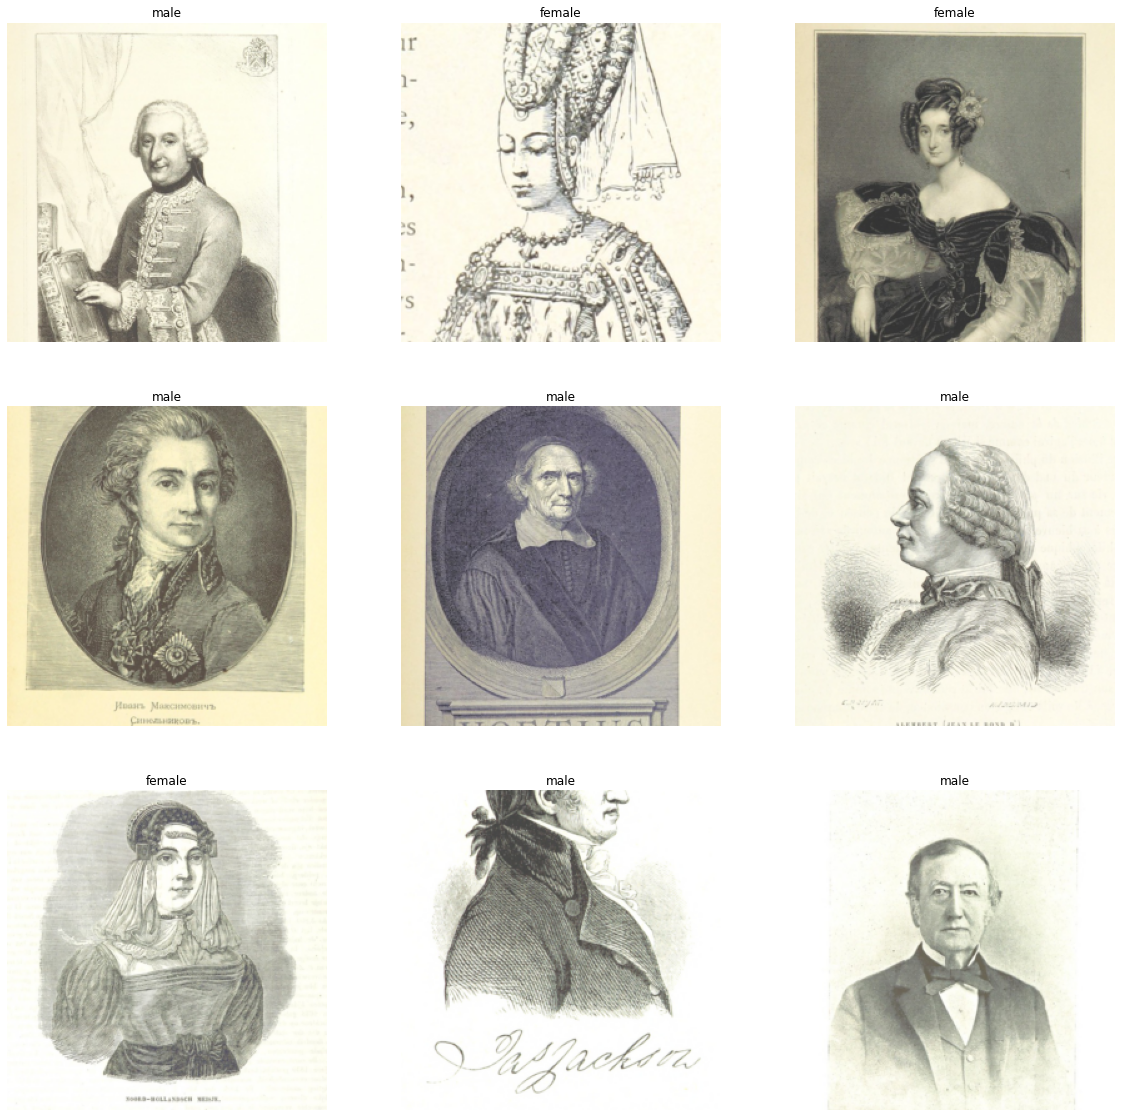

In [4]:
gender_data.show_batch(figsize=(20,20))

What does the variable `gender_data` contain?

In [24]:
gender_data

### Looking inside the data

In [25]:
x, y = gender_data.one_batch()

In [26]:
x[0]

tensor([[[0.9843, 0.9843, 0.9843,  ..., 0.9961, 0.9961, 1.0000],
         [0.9804, 0.9843, 0.9804,  ..., 0.9961, 0.9961, 1.0000],
         [0.9804, 0.9804, 0.9804,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.9843, 0.9765, 0.9765,  ..., 0.9961, 0.9961, 0.9961],
         [0.9804, 0.9765, 0.9765,  ..., 0.9961, 0.9961, 0.9961],
         [0.9765, 0.9765, 0.9765,  ..., 0.9961, 0.9961, 0.9961]],

        [[0.9569, 0.9569, 0.9569,  ..., 1.0000, 1.0000, 1.0000],
         [0.9529, 0.9569, 0.9529,  ..., 1.0000, 1.0000, 1.0000],
         [0.9529, 0.9529, 0.9529,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9529, 0.9529, 0.9529,  ..., 0.9961, 0.9961, 0.9961],
         [0.9569, 0.9529, 0.9569,  ..., 0.9961, 0.9961, 0.9961],
         [0.9529, 0.9529, 0.9529,  ..., 0.9961, 0.9961, 0.9961]],

        [[0.8471, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9451],
         [0.8431, 0.8471, 0.8471,  ..., 0.9373, 0.9373, 0.9412],
         [0.8471, 0.8471, 0.8471,  ..., 0.9373, 0.9373, 0.

In [27]:
y[0]

tensor(1, device='cuda:0')

## Training a model

Using the fastai library we will create a `cnn_learner`. We need to pass the data we loaded above. We can then also pass in the metrics we want to assess our model on. 

**Remember we can usually peek at what arguments are required by a function by hitting shift tab.**

In [28]:
learn = cnn_learner(gender_data, resnet18, metrics=error_rate)

The first time you use this function you will see that a file is downloaded, we'll get back to what this is later on, but fastai download the specified CNN model (in this case Resnet).

Let's inspect what this model actually contains by calling the `summary()` method.

In [29]:
learn.summary()

Sequential (Input shape: ['32 x 3 x 256 x 256'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 128 x 128  9,408      False     
________________________________________________________________
BatchNorm2d          32 x 64 x 128 x 128  128        True      
________________________________________________________________
ReLU                 32 x 64 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 64 x 64 x 64    36,864     False     
________________________________________________________________
BatchNorm2d          32 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 32 x 64 x 64 x 64    0          False     
_________________________________________________

Wow, that's a lot of layers and parameters (~11 million in total). Now, how does this model perform on portraits of "male" and "female"?

### Train the model 

So far we have; 
- downloaded some data
- loaded our data and labels 
- created and inspected a CNN model 

Now, we need to move to **training** our model. This is pretty simple to start with. 

We'll train for five **epochs** (i.e. five runs over our training data)

In [31]:
learn.fit_one_cycle(5)

Note that we report the **error rate** instead of **accuracy** (error_rate = 1 - accuracy).

### Find a sensible learning rate for more training

- One of the important practical considerations for training a neural network is to find a sensible **learning rate**. Put very crudely this is a parameter which defines how aggressively the network tries to improve itself (how aggressively it **updates the parameters** during training). We will return to this concept and make it slightly less crude later on. 
- Finding a good learning rate can be tricky and is sometimes portrayed as an art (see what happens when you use a wrong--very high--learning rate! the validation loss will explode, meaning your model's performance just evaporated)
- fastai provides useful tools for finding a sensible learning rate (`lr_find`)

## Reminder 
- We can use ? and ?? to see documentation, source for a function in the notebooks 
- We can also use 'doc' to access the documentatiton for fastai

In [35]:
doc(learn.lr_find)

This function train the model with (linearly) increasing learning rates from a small number (10e-8) to a high number (1 or 10). We can then plot this. 

In [41]:
learn = cnn_learner(gender_data, resnet18, metrics=error_rate)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=9.12010818865383e-07)

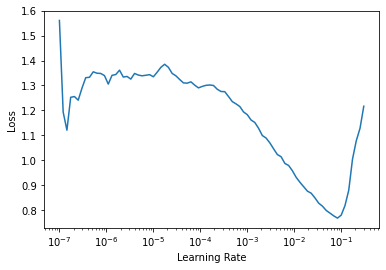

In [42]:
learn.lr_find()

- We want to pick a point where the loss is still dropping down a bit but not too near the bottom
- More on finding a good learning rate: https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html

In [43]:
learn.fit_one_cycle(5, max_lr=1e-03)

In [44]:
learn.fit_one_cycle(10, max_lr=1e-04)

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

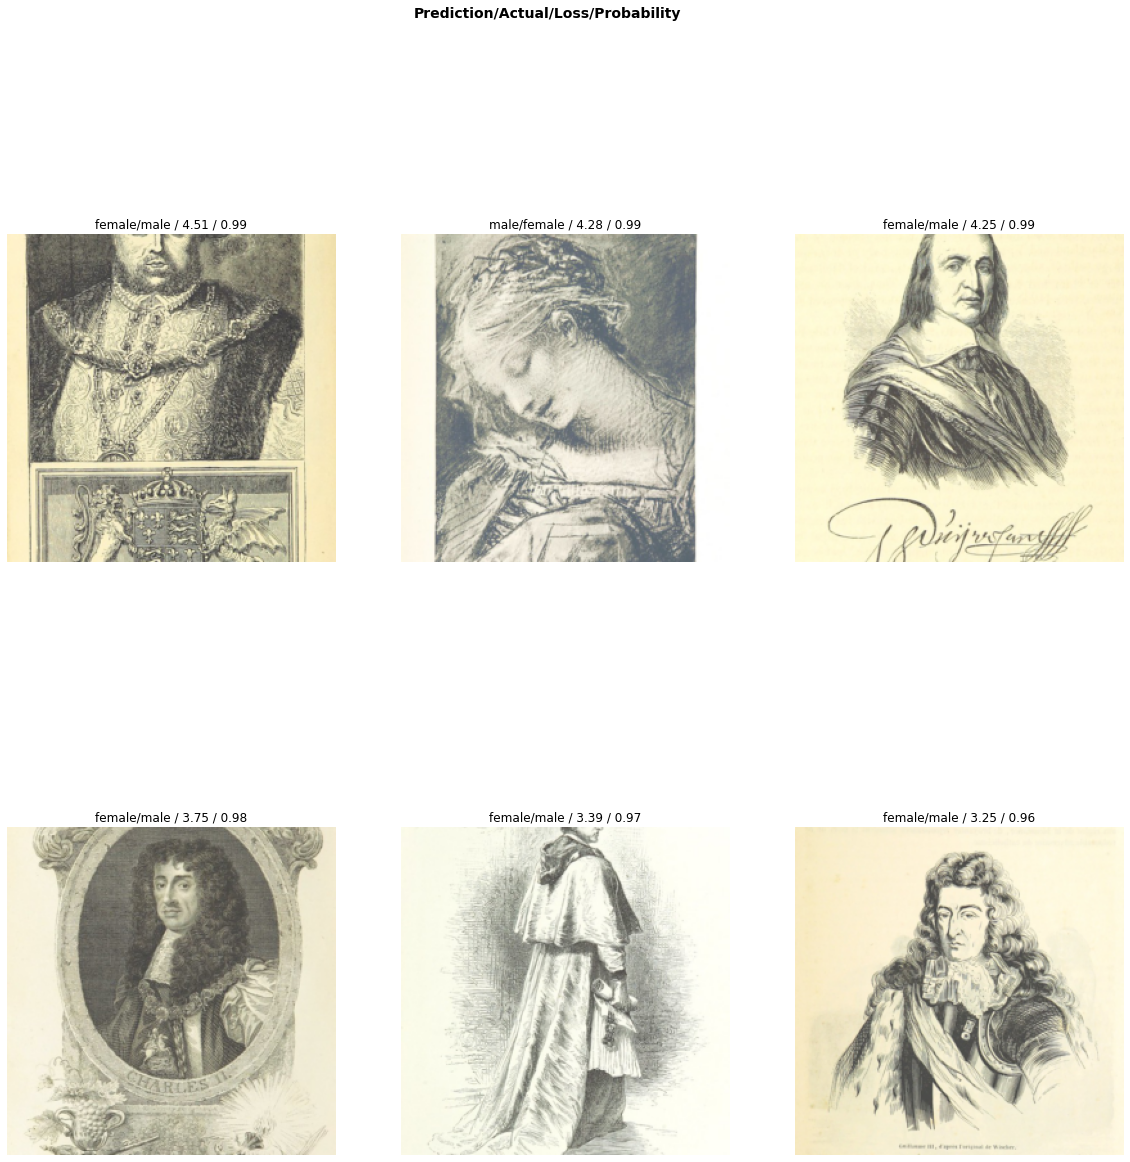

In [47]:
interp.plot_top_losses(6, figsize=(20,20))

### What is a good accuracy?
- I don't know...
- For binary classification getting to +90% accuracy would be nice?
- For academic datasets/kaggle we usually have a way of comparing results. This is less likely to be the case for things we might do in a Library setting 
- Benchmarking against human accuracy *can* be useful. If it's hard for a human then it's probably going to be hard for a machine!  

## Overfitting 

- Oftentimes, the accuracy of our model improves in the first run of training, during the second step of training it starts to go down.
- What is likely happening here is that we are now over-fitting our model - what does this mean?

![Over-fitting diagram](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png) 


- When we're training a model we need to have some way of checking how **well it's performing**. To do this we usually want to have some **validation data** that the model doesn't learn from but is only used to **check** performance.
- This is done to make sure that our model isn't just learning our specific data but more general patterns.
- An analogy would be memorising all the answers to a maths exam. You might score 100% if you get the same questions but you might not do well on things you haven't seen before. 

### Training loss and validation loss 

- If you look at the outputs of our ```learn.fit``` method you'll see that besides the accuracy we also have something called ```train_loss``` and ```valid_loss```
- We'll skip over some of the details but we can think of loss as 'how wrong' our model is. 
- You can see that there is usually some difference between how wrong it is on our training and validation data. 
- What we want to see is that both are going down while we train, they may go up and down a little bit but ideally we'll see them continue to go down. 


# Transfer learning 

### What is imagenet and what is the network pre-trained to do?
- '[ImageNet](http://www.image-net.org/) is an image database organized according to the WordNet hierarchy (currently only the nouns), in which each node of the hierarchy is depicted by hundreds and thousands of images.' [Source](http://www.image-net.org/)

- 'Based on statistics about the dataset recorded on the ImageNet homepage, there are a little more than 14 million images in the dataset, a little more than 21 thousand groups or classes (synsets), and a little more than 1 million images that have bounding box annotations (e.g. boxes around identified objects in the images).The photographs were annotated by humans using crowdsourcing platforms such as Amazon’s Mechanical Turk.' [Source](https://machinelearningmastery.com/introduction-to-the-imagenet-large-scale-visual-recognition-challenge-ilsvrc/)

- Our network has been pre-trained to classify images into categories i.e. dog, cat, train, car, flower...

fastai allows us to either use a **pretrained model**, or train a network starting from **random weights**.

# Without transfer learning 

In [50]:
learn_no_pretrain = cnn_learner(gender_data, resnet18, pretrained=False, metrics=error_rate)

In [51]:
learn_no_pretrain.fit_one_cycle(5)

# With transfer learning

In [52]:
learn_pre_trained = cnn_learner(gender_data, resnet18, pretrained=True, metrics=error_rate)

In [53]:
learn_pre_trained.summary()

Sequential (Input shape: ['32 x 3 x 256 x 256'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 128 x 128  9,408      False     
________________________________________________________________
BatchNorm2d          32 x 64 x 128 x 128  128        True      
________________________________________________________________
ReLU                 32 x 64 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 64 x 64 x 64    36,864     False     
________________________________________________________________
BatchNorm2d          32 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 32 x 64 x 64 x 64    0          False     
_________________________________________________

In [54]:
learn_pre_trained.fit_one_cycle(5)

# Why are the results so different? 🧐

In the latter example, we used information the model gained by training on a **set of millions of images**. Even though our task is different, training on a large data set has enabled the model to learn useful features that help with categorizing 19th century portraits. 

In general, the earlier layers tend to capture very **generic features** (such as edges and gradients) which are composed into more **complex and specific features** in later layers (like eyes). Because we just add one more extra layer, we adapt the model to a new task, still using information it learned from processing millions of other images.

This process of adapting an **existing model to a new task**, is called "transfer learning". It mostly involves **fine-tuning** specific layers of the model.

# Fine-tuning lower layers 
We can see above that only some of the parameters are trainable. 

![](https://i.stack.imgur.com/rLICu.jpg)

To fine-tune the model we need to **unfreeze** the layers.

In [55]:
learn_pre_trained = cnn_learner(gender_data, resnet34, pretrained=True, metrics=error_rate)
learn_pre_trained.unfreeze()
learn_pre_trained.summary()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Sequential (Input shape: ['32 x 3 x 256 x 256'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 128 x 128  9,408      True      
________________________________________________________________
BatchNorm2d          32 x 64 x 128 x 128  128        True      
________________________________________________________________
ReLU                 32 x 64 x 128 x 128  0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 64 x 64    0          False     
________________________________________________________________
Conv2d               32 x 64 x 64 x 64    36,864     True      
________________________________________________________________
BatchNorm2d          32 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 32 x 64 x 64 x 64    0          False     
_________________________________________________

SuggestedLRs(lr_min=0.0003019951749593019, lr_steep=9.120108734350652e-05)

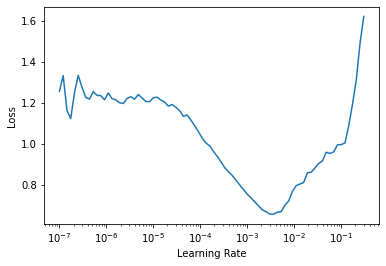

In [56]:
learn_pre_trained.lr_find()

It is often not a good idea to change the parameters of all the layers. This could result in a model that **forgot** useful features.

We want to update the **later layers** more aggressively, while leaving the earlier ones (those that capture the generic features) untouched. 

In fastai we can do this by passing a `slice()` object to the `max_lr` attribute.

In [57]:
learn_pre_trained.fit_one_cycle(10, max_lr=slice(1e-04,1e-03))

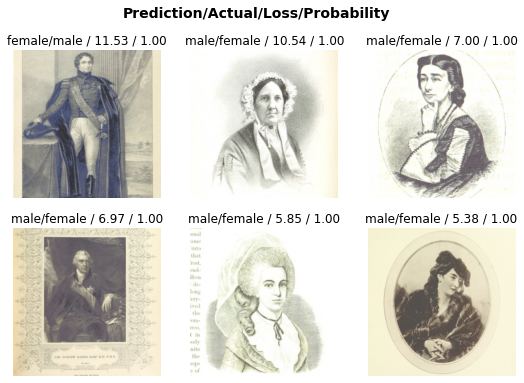

In [58]:
interp = ClassificationInterpretation.from_learner(learn_pre_trained)
interp.plot_top_losses(6)

# Benefits of using transfer learning (for DH)
- Training dataset can be much smaller 
- Improved accuracy 
- Cost of training reduced 
- Speed of convergence quicker 
- [Environmental costs reduced](https://www.technologyreview.com/s/613630/training-a-single-ai-model-can-emit-as-much-carbon-as-five-cars-in-their-lifetimes/) 

# Image augmentation 

There are some other tricks we can use to improve our results further. One of these is image augmentation 

## What is it?

Let's take a look at an example to illustrate what it means. 

In [59]:
tfms = aug_transforms(max_rotate=25)

In [60]:
gender_data = ImageDataLoaders.from_folder(path, # use the folder structure as labels
                           valid_pct=0.3, # how many examples should we use for training the model, how many for validating
                           seed=42, # make research reproducible!
                           item_tfms=Resize(256), # image quality
                           batch_tfms=tfms, # <- Transformations
                           bs=16) # batch size, change this parameter if your GPU runs out of memory


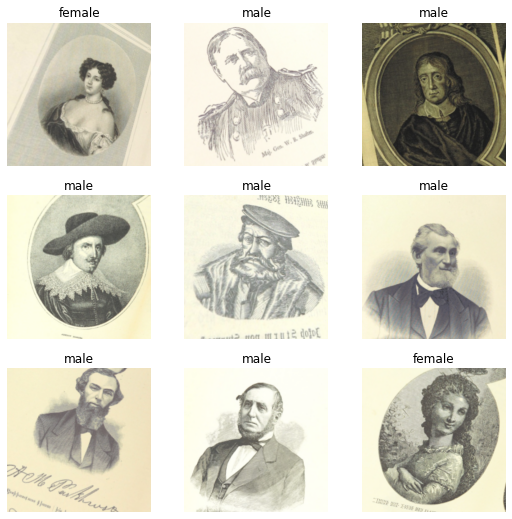

In [61]:
gender_data.show_batch()

## topsy turvy! 

We can see that what this transformation does it rotate our images. Other transformations will do other things to images to make them look different. 

## Why it helps? 
When we do a transformation to an image we know which class/label is associated with it. However, for the model and image which has been rotated is different to the same image withut the transformation. In this way you essentially get some free training data since you can show your model more examples without having to do any additional annotation. 

## Does it work?


In [62]:
tfms = aug_transforms(max_rotate=25,
                      do_flip=True,
                      max_zoom=1)

In [65]:
gender_data = ImageDataLoaders.from_folder(path, # use the folder structure as labels
                           valid_pct=0.3, # how many examples should we use for training the model, how many for validating
                           seed=42, # make research reproducible!
                           item_tfms=Resize(256, ResizeMethod.Pad), # image quality
                           batch_tfms=tfms, # <- Transformations
                           bs=16) # batch size, change this parameter if your GPU runs out of memory


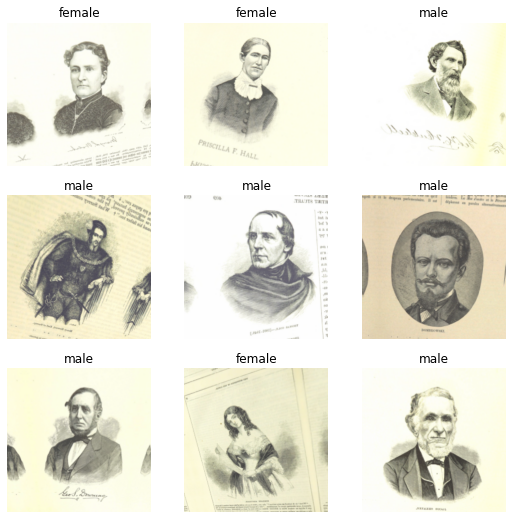

In [66]:
gender_data.show_batch()

In [69]:
learn = cnn_learner(gender_data, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=6.309573450380412e-07)

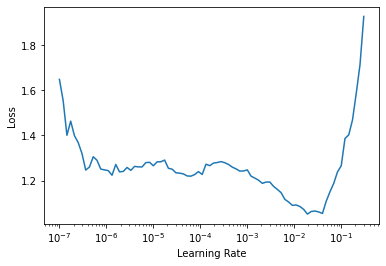

In [70]:
learn.lr_find()

In [71]:
learn.fit_one_cycle(10,max_lr=1e-03)

## What's the catch?
There are a wide range of transformations you can do. Many of these simulate what you would expect to see in your data i.e. photos taken outside may have sun flares. However, for images taken in a digization studio we would hope not to see things like colour erros, blur etc. Other images don't make sense if you flip them (i.e. text) so it's worth playing around with the best combo for your task...

In [78]:
learn = cnn_learner(gender_data, resnet34, metrics=error_rate, cbs=[MixUp(), ReduceLROnPlateau(patience=2, monitor='error_rate')])

In [80]:
learn.fine_tune(15)

Epoch 5: reducing lr to 9.582815406665397e-05
Epoch 7: reducing lr to 7.66018423397426e-05
Epoch 9: reducing lr to 4.81309567541535e-05
Epoch 11: reducing lr to 2.0309787272698047e-05
Epoch 13: reducing lr to 2.8068058679989053e-06


# Choosing labels

Many times if you are applying computer vision in a digital humanities context *you* will be deciding and *assigning* the labels. You may of course used CV for a pragmatic task which can be automated by CV. In these situations CV might be a helpful tool but not one on which you base your research claims.

If however, you will use CV to work at a scale where you could not manually look at all the images, then you may end using the predictions of a computer vision classifier as a basis for other arguments. For example source $a$ has more of label $x$ than source $b$. You will need to think carefully both about what label $y$ is and whether there are reasons why a classifier might work better or source $a$ or source $b$. 

It also important to think about the role of the annotator in this process. Is the model learning to predict objective labels, or is it learning to predict what the annotator would have predicted? 